<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Programmierung für KI
### Winterersemester 2023/24
Prof. Dr. Heiner Giefers

## Einführende Beispiele und Aufgaben

Vor einer etwas größeren Aufgabe (*Plotten von Klimadaten*) wollen wir die Plotting-Funktionen von Matplotlib anhand einfacher Beispiele erproben. Wir werden dazu die folgenden Teilaufgaben durchgehen:

- Eine Datenreihe auf Grundalge einer linearen Funktion erstellen und plotten
- Mehrere Funktionen in die gleiche Abbildung plotten
- Mehrere Koordinatensysteme in die gleiche Abbildung plotten
- Streudiagramme plotten


**Aufgabe:** Erstellen Sie eine *verrauschte* Datenreihe auf Basis einer Linearen Funktion $f(x)=1.7x+3.2$.
100 $x$-Werte im Bereich von 0 bis 10, für die die Funktion berechnet soll, sind bereits im *ndarray* `x` abgelgt.
Wir verwenden hierzu die Funktion [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) aus NumPy-
Außerdem ist bereits ein *ndarray* `noise` angelegt, dass 1000 normalverteilte Werte mit dem Erwartungswert $\mu=0$ und der Standardabweichung $\sigma=3$ enthält.
Hierzu verwenden wir die Funktion [`np.random.randn`](https://numpy.org/doc/stable/reference/generated/numpy.matlib.randn.html#numpy.matlib.randn).
Sie können `noise` verwenden, um die Funktion $f$ zu *verrauschen*.
Die Werte von $f(x)$ sollen im *ndarray* `y` abgelegt werden. [Plotten](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) Sie anschließend die Funktion über die Datenreihen `x` und `y`.


,x,y
0,0.00000,2.873733
1,0.10101,4.907361
2,0.20202,7.558193
3,0.30303,-1.467945
4,0.40404,7.795255


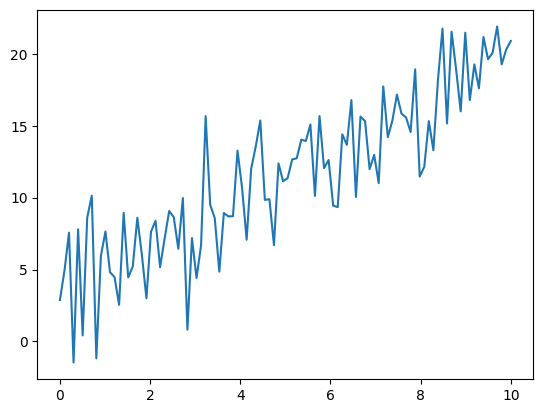

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
noise = np.random.randn(x.size)*3
y = None
# YOUR CODE HERE
#raise NotImplementedError()
y = (1.7*x+3.2) + noise       # Daten verrauschen
plt.plot(x,y)                 # Plot mit verrauschen Daten
df = pd.DataFrame(data={"x": x, "y": y})
df.head()

**Aufgabe:** Verwenden Sie die unten angegebene Funktion `moving_average` zur Berechnung des gleitenden Mittelwerts, um die Funkion $f: x\mapsto y$ zu glätten. Als Fenstergröße wählen Sie `w=5`. Plotten Sie beide Funktionen in ein gemeinsames Koordinatensystem.

Die ursprüngliche Funktion $f$ soll grau und mit einer durchgehenden Linie geplottet werden. Die geglättete Funktion soll mit einer getrichelten roten Linie mit einer Dicke von $2$ geplottete werden.

Erzeugen Sie eine Legende, die Beschriftungen für beide Funktionen, $f$ und $f_{avg}$ enthält.

```python
def moving_average(data, w):
    return np.convolve(data, np.ones(w)/w, 'same')
```

Das Ergebnis soll wie folgt aussehen:
![](https://github.com/fhswf/pki/blob/main/p7/p7a1.png?raw=1)

,x,y,y_avg
0,0.00000,2.873733,3.067857
1,0.10101,4.907361,2.774268
2,0.20202,7.558193,4.333319
3,0.30303,-1.467945,3.841997
4,0.40404,7.795255,4.582217


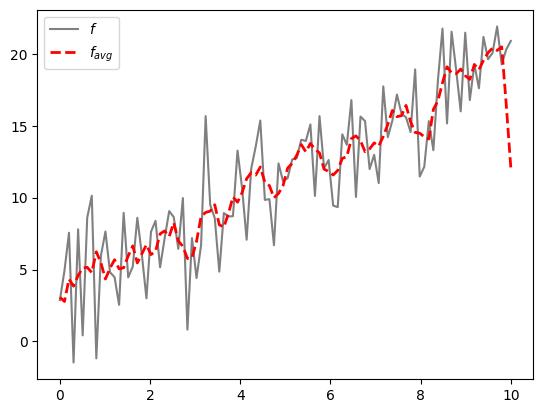

In [ ]:
#y_avg = None
# YOUR CODE HERE
#raise NotImplementedError()


### BEGIN SOLUTION
def moving_average(data, w):
    # np.convolve: Gibt die diskrete, lineare Faltung zweier eindimensionaler Folgen zurück
    # Zur Berechnung des gleitenden Mittelwerts, um die Funkion zu glätten
    return np.convolve(data, np.ones(w)/w, 'same')                # np.ones(w)/w: [1. 1. 1. 1. 1.] / 5 = [0.2 0.2 0.2 0.2 0.2]

y_avg = moving_average(y, 5)
plt.plot(x,y, c='grey', label=r'$f$')
plt.plot(x,y_avg, c='r', ls='--', lw=2, label=r'$f_{avg}$')       # Raw String: mathematische Scheibweise $f_{avg}$
plt.legend()
plt.savefig("p7a1.png")
plt.legend()
df = pd.DataFrame(data={"x": x, "y": y, "y_avg": y_avg})
df.head()

**Aufgabe:** Ändern Sie den Plot so, dass die beiden Funktionen in separate Koordinatensysteme geplottet werden.
Beschriften Sie die y-Achsen mit den Labeln $y$ und $y_{avg}$.

Das Ergebnis soll wie folgt aussehen:
![](https://github.com/fhswf/pki/blob/main/p7/p7a2.png?raw=1)

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()


**Aufgabe:** Plotten Sie die Datenreihen $x$ und $y$ als Streudiagramm. Plotten Sie in das gleiche Koordinatensystem eine Gerade mit der Steigung $1.7$ und dem y-Achsenabschnitt $-3.2$.

Verwenden Sie den Fehler `noise`, um die Punkte mit einem größeren Abstand zur Geraden entsprechend größer zu plotten.

Die Abbildung solle eine Größe von `(10,3)` haben.


Das Ergebnis soll wie folgt aussehen:
![](https://github.com/fhswf/pki/blob/main/p7/p7a3.png?raw=1)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
len(np.abs(noise)) , len(y)

## Klimadaten Plotten

*Das 1961 gegründete Goddard Institute for Space Studies (GISS) ist ein Forschungsinstitut der NASA mit Sitz in New York. Seit den 1980er Jahren zählt das GISS zu den weltweit führenden Forschungszentren im Bereich Atmosphärenmodellierung und Klimaforschung, wobei Klimaprognosen für das 21. Jahrhundert zu den Schlüsselfeldern zählen. Seit den 1970er Jahren werden zudem, unter Federführung des langjährigen Direktors James E. Hansen, aus verschiedenen Datensätzen Analysen zur globalen Oberflächentemperaturänderung entwickelt, die einen wertvollen Beitrag zur Erforschung des Klimawandels darstellen.*
(Quelle: [sicherheitspolitik.bpb.de](https://sicherheitspolitik.bpb.de/de/m8/layers/climate-change/temp-inc/infotext))

Ein Fokus der Arbeit des GISS besteht in der Beobachtung von langfristigen Temperaturänderungen über den Zeitraum von Jahrzehnten bis Jahrhunderten. Aus den Daten berechnnet das GISS Temperatur-Anomalien gegenüber einer eine festen Basisperiode.
Die GISTEMP-Analyse basiert auf Temperaturberichten von Wetterstationen und Wassertemperaturberichten von Schiffen und Bojen.

Über die Homepage [data.giss.nasa.gov](data.giss.nasa.gov) bietet das GISS Datensätze zum Download an.
Für dieses Aufgabenblatt verwenden wir den [GISTEMP v4](https://data.giss.nasa.gov/gistemp/graphs_v4/) Datensatz.
Darin wird der Verlauf der globalen Durschnittstemperatur über die Jahresmonate und relativ zur mittleren globalen Temperatur im Zeitraum von 1980 bis 2015 erfasst.

#### Beschaffen des Datensatzes

Zuerst müssen wir den Datensatz von der GISS Homepage herunterladen.
Als Datenformat wählen wir das *Comma Separated Values* Format (csv) und speichern die Daten lokal in der Datei *gistemp.csv*.

In [ ]:
import requests
url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/GISTEMP_Seasonal_Cycle_since_1880/graph.csv"
headers={'User-Agent': 'Mozilla/5.0'}
r = requests.get(url, headers=headers)
if r.status_code == 200:
    try:
        f = open("gistemp.csv", 'wb')
        f.write(r.content)
    except:
        print("Irgendetwas ist schief gegangen!")
else:
    print("Status code",  r.status_code)

#### Verwendete Bibliotheken

Für dieses Beispiel verwenden wir neben NumPy, Matplotlib und Pyplot auch die Bibliothek Pandas.
Pandas ist eine extrem nützliche Bibliothek zur Verarbeitung *tabellarischer Daten* in Python.
Wir werden an dieser Stelle nicht länger auf die Möglichkeiten der Bibliothek eingehen, sondern uns auf das beschränken, was wir für unsere Aufgaben benötigen.

Das Wichtigste, was Sie über Pandas wissen müssen ist, dass Tabellen in einer Datenstruktur namens *DataFrame* abgelegt werden.
*DataFrames* haben benannte Spalten mit denen man ähnlich rechnen kann, wie mit NumPy Arrays (tatsächlich sind die Daten auch als `ndarrays` abrufbar).
Wie in Tabellenkalkulationen (wie z.B. Excel) kann man auch in *DataFrames* sehr einfach neue Spalten anlegen, z.B. indem man die Werte andere Spalten durch Berechnungen kombiniert.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Im folgenden Code abschnitt laden wir die GISS Temperaturdaten aus der CSV-Datei in den *DataFrame* `temp`.
Die erste Zeile der Detei enthält ein Kommentar, daher überspringen wir sie.
Mit der Methode `head()` können wir uns die ersten Zeilen des *DataFrames* anzeigen lassen.
Jupyter formatiert die Tabelle, so dass sie gut lesbar ist.

In [ ]:
temp = pd.read_csv("gistemp.csv", skiprows=1)
temp.head(12)

,Year,Anomaly
0,1880.04,-2.61
1,1880.13,-2.40
2,1880.21,-1.57
3,1880.29,-0.63
4,1880.38,0.37
5,1880.46,0.94
6,1880.54,1.25
7,1880.63,1.19
8,1880.71,0.52
9,1880.79,-0.59


Wir sehen, dass die Daten lediglich aus 2 Spalten bestehen, die mit *Year* und *Anomaly* benannt sind.
Ganz links sehen wir einen fortlaufenden Spaltenindex, den Pandas beim Erstellen des *DataFrames* erzeugt.

Die Jahreszahl ist etwas irritierend. Wir sehen, dass die Variable `Year` eine Kommazahl ist.
Ein Wert `1880.04` bedeutet, dass die Temperatur nach 4% der Tage im Jahr 1880 gemessen wurde.
4% von 365 Tagen sind 14,6 Tage, man kann also erkennen, dass hier die Temperaturen circa zu Mitte eines Monats bestimmt werden.

Ein Vorteil dieser Notation ist, dass man die "Jahreszahlen" direkt Plotten kann, da sie einer metrischen Skalierung folgen.

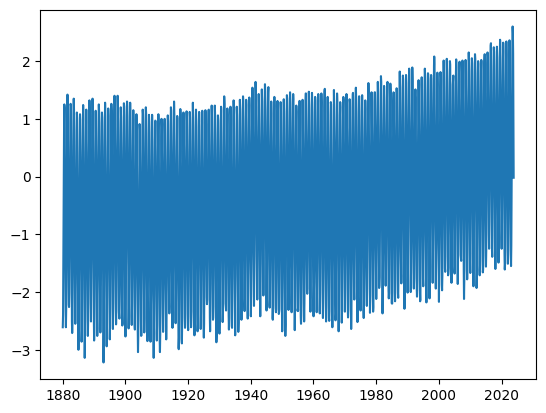

In [ ]:
plt.plot(temp["Year"],temp["Anomaly"])

temp["day"]= (temp["Year"]//1).astype("int")


Leider hilft dieser Plot kaum. Die Temperaturen unterliegen Schwankungen im Jahresverlauf um ca 5 °C. Außerdem ist der Zeitraum zu lang für einen Plot dieses Formats.

Eine Einschränkung des Datensatzes auf die Jahre ab 1990 macht die Abbildung *lesbar*, liefert aber ebenfalls keine besonderen Erkenntnisse.

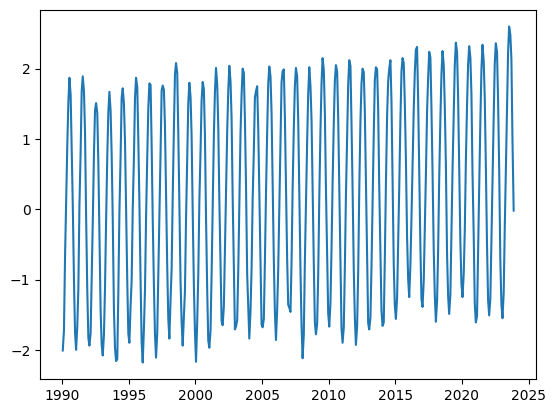

In [ ]:
neuer_df = temp[temp["Year"]>1990]
plt.plot(neuer_df["Year"],neuer_df["Anomaly"])

Eine Darstellung, die interessant wäre ist, die Temperatur-Anomalie für einen bestimmten Monat (z.B. den Juli) seit 1880 zu plotten.

Zum Glück bietet Pandas eine Möglichkeit, Daten-Zeilen und -Spalten über Indizes auszuwählen.
Dies funktioniert sehr ähnlich wie das *Array Slicing* in NumPy.
Auf die Indizes eines *DataFrames* greift man über das Attribut `iloc` zu.

Die folgende Code Zelle plottet die Temperatur-Anomalien in den Januar Monaten von 1880 bis 2022.

**Aufgabe:** Ändern Sie den Code so ab, dass die Juli-Temperaturen verwendet werden.

         Year  Anomaly   day
6     1880.54     1.25  1880
18    1881.54     1.42  1881
30    1882.54     1.26  1882
42    1883.54     1.35  1883
54    1884.54     1.11  1884
...       ...      ...   ...
1674  2019.54     2.37  2019
1686  2020.54     2.32  2020
1698  2021.54     2.34  2021
1710  2022.54     2.36  2022
1722  2023.54     2.60  2023

[144 rows x 3 columns]


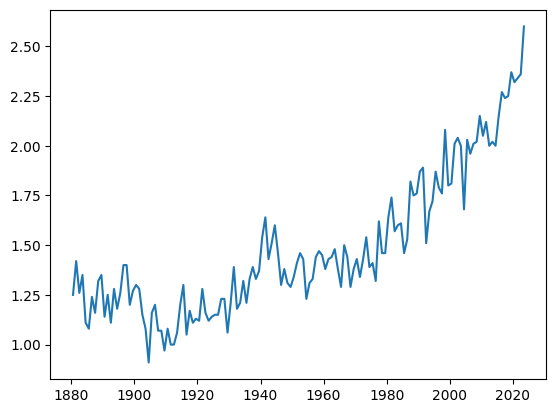

In [ ]:
neuer_df = temp.iloc[6::12, :]
# YOUR CODE HERE
#raise NotImplementedError()
print(neuer_df)
plt.plot(neuer_df["Year"],neuer_df["Anomaly"])

Statt nur jeweils einen Monat auszuwählen, wäre es besser, den Mittelwert der Temperatur-Anomalien über einen gewissen Zeitraum zu betrachten. Ist der Zeitraum groß genug, so gleichen sich die Abweichungen im Jahresverlauf gegeneinander aus.

Ein solcher *gleitender Mittelwert* wird allgemein zur Glättung von Zeit- bzw. Datenreihen eingesetzt.
Pandas besitzt eine Methode `rolling(k)`, die, angewendet auf eine oder mehrere Spalten eines *DataFrames*, ein Fenster von `k` aufeinander folgenden Elementen liefert.
Auf dieses Fester kann dann eine zusammenfassende Funktion angewendet werden, wie etwa:
- `mean()` zum Berechnen des arithmetischen Mittelwerts
- `max()` oder `min()` zum Bestimmen von Extremwerten im Bereich des Fensters
- `median()` zum Bestimmen des Median-Elements im Bereich des Fensters

Im Beispiel unten wenden wir eine Mittelwert-Berechnung über ein Fenster von 3 Elementen auf die Spalte `x_0` unseres *DataFrames* an, die Resultate werden in der Spalte `x_1` abgelgt.
Man sieht, dass `rolling` (jedenfalls mit den Standardeinstellungen) "zurück schaut", also erst nach 3 Werten einen sinnvollen Mittelwert berechnen kann.

In [ ]:
df = pd.DataFrame(data={"x_0": [x for x in range(10)]})
df["x_1"] = df["x_0"].rolling(3).mean()
df

,x_0,x_1
0,0,NaN
1,1,NaN
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0


Kommen wir zurück auf unseren Temperatur Datensatz.
Wir können die `rolling`-Methode nun auch auf die Temperatur-Anomalien anwenden.

**Aufgabe:** Glätten Sie die Temperatur-Anomalien von 1880 bis heute über einen Zeitraum von 5 Jahren und Plotten Sie das Ergebnis.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Saisonaler Temperaturverlauf (optional)

Statt eines Plots, bei dem sich die x-, bzw. die Zeitachse über den Zeitraum von 1880 bis heute erstreckt, kann man sich auch die Temperatur-Abweichungen im Verlauf eines Jahres anzeigen lassen.
Eine solche Grafik enthält mehr Details, da sie nicht einfach über die Monate hinweg mittelt.

Um mehrere Jahre zu vergleichen, kann man mehrere Datenreihen in das gleiche Koordinatensystem plotten.
Stellt man die Verläufe in den unterschiedlichen Jahren (und Jahrzehnten) farblich unterschiedlich da, so können auch aus diesem Graph langfristige Veränderungen abgelesen werden.

Eine solche Darstellung erstellt auch das GISS Institut, von dem der Datensatz stammt.
Die folgende Abbildung zeigt den aktuellen *GISTEMP Seasonal Cycle* Graph von der GISS Homepage.
Unser Ziel ist es nun, diesen Graph mit *Matplotlib* möglichst getreu nachzustellen.

![](https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/GISTEMP_Seasonal_Cycle_since_1880/graph.png)

Schauen wir uns die obige Abbildung an. Wir sehen folgende Elemente
- Die Temperatur-Anomalien alle Jahrgänge sind in ein Diagramm gezeichnet.
- Die Farben der einzelnen "Jahres-Plots" variieren nach einem bestimmten Farbschema. Beginnend vom ersten Jahr 1880 bis zum aktuellen Jahr nimmt die *Farbtemperatur* zu, von Blau zu Grün, über Gelb hin zu Rot und schließlich einem dunklen Violett. Durch diese Farbgebung wird aus dem Graph ersichtlich, dass sich die Temperaturen *nach oben* verschieben.
- Das Diagramm besitzt einen Titel, beide Achsen sind ebenfalls mit einem Titel (*Label*) versehen.
- Die x-Achse ist mit Markern (*Ticks*) versehen, die mit den Abkürzungen der Monatsnamen beschriftet sind.
- Die Abbildung besitzt eine Legende. Die Farbcodierung der einzelnen Plots ist im-20 Jahres-Rhythmus angegeben.
- Das letzte Jahr ist mit kreisrunden Markern für die einzelnen Messpunkte dargestellt und endet im November
- Das letzte Messergebnis ist mit einer Annotation versehen.

**Aufgabe:** Bilden Sie das oben dargestellte Diagramm mit Matplotlib möglichst getreu nach. Am besten gehen Sie so vor, dass Sie die oben genannten Elemente nach und nach in den Matplotlib Graphen einfügen.

Hier noch einige Tipps/Vorarbeiten, um die Aufgabe vorzubereiten.
Wir fügen dem *DataFrame* zwei Spalten `Jahr` und `Tag` hinzu, die die (echte) Jahreszahl bzw. die Tageszahl enthalten.

In [ ]:
temp["Jahr"] = (temp["Year"]//1).astype(int)
temp["Tag"] = ((temp["Year"]-temp["Jahr"])*365).astype(int)
temp.head()

,Year,Anomaly,day,Jahr,Tag
0,1880.04,-2.61,1880,1880,14
1,1880.13,-2.40,1880,1880,47
2,1880.21,-1.57,1880,1880,76
3,1880.29,-0.63,1880,1880,105
4,1880.38,0.37,1880,1880,138


Sie wissen ja bereits, dass man mehrere Datensreihen in ein Koordinatensystem plotten.
Das geht natürlich auch in einer `for`-Schleife:

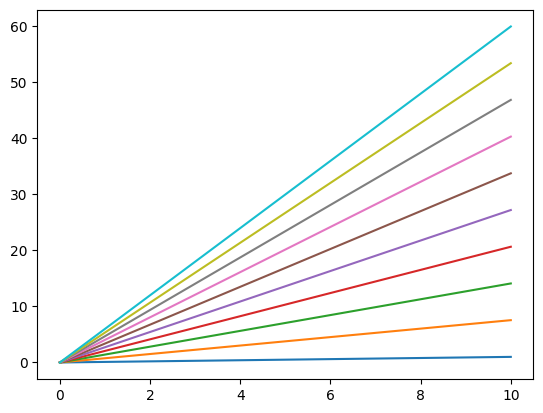

In [ ]:
x = np.linspace(0,10,20)
for s in np.linspace(0.1,6,10):
    y = s*x
    plt.plot(x,y)

Matplotib besitzt eine Vielzahl verschiedener *Colormaps*, die zum Einfärben der Plots verwendet werden können.
Im folgenden Code-Beispiel geben wir einige Punkte entlang der *Colormap* `jet` aus.
Diese passt bereits recht gut zum gewünschten Farbverlauf.

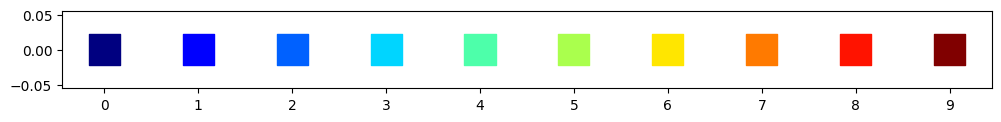

In [ ]:
colors = mpl.colormaps['jet']
N = 10
x = np.arange(N)
y = np.zeros(N)
col = colors(np.linspace(0,1,N))
fig, ax = plt.subplots(figsize=(12,1))
ax.scatter(x, y, c=col, s=500, marker='s')
ax.set_xticks(x)
plt.show()

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()
colors = mpl.colormaps['jet']
N = 10
x = np.arange(N)
y = np.zeros(N)
col = colors(np.linspace(0,1,N))
fig, ax = plt.subplots(figsize=(12,1))
ax.scatter(x, y, c=col, s=500, marker='s')
ax.set_xticks(x)
plt.show()

**Aufgabe:** Speichern Sie abschließend Ihren Plot in eine Bilddatei (z.B. in ein PNG).